# Reading and saving data from robot into a file

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
filename='/Users/viivihalla-aho/Documents/lego/legorobot/scripts/mvp_log_2022-05-01T14:13:36.log'

In [83]:
distances = []

with open(filename,'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'distance' in line.strip():
            distances.append(float(line.strip().split(' ')[1]))

In [75]:
acceleration = []

def readmatrixline(file):
    return float(file.readline().strip().lstrip('[').rstrip('],').strip()) 

with open(filename,'r') as file:
    line = file.readline()
    while line:
        if 'acceleration' in line.strip():
            acceleration.append([readmatrixline(file) for _ in range(3)])
        line = file.readline()

In [81]:
timer= []

with open(filename,'r') as file:
    lines = file.readlines()
    for line in lines:
        if 'delta_time' in line.strip():
            timer.append(float(line.strip().split(' ')[1]))

In [84]:
acceleration_a= np.array(acceleration)
distances_a = np.array(distances)
timer_a = np.array(timer)

In [88]:
d_dict=dict(accelerationx=acceleration_a[:,0],
    accelerationy=acceleration_a[:,1],
    accelerationz=acceleration_a[:,2],
    distance=distances_a)

In [91]:
robot_df = pd.DataFrame(d_dict,index=pd.TimedeltaIndex(timer_a.cumsum(),unit='ms'))

## Plotting the variables

<AxesSubplot:>

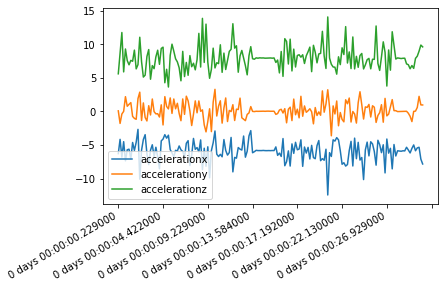

In [94]:
robot_df.filter(regex='acceleration').plot()

<AxesSubplot:>

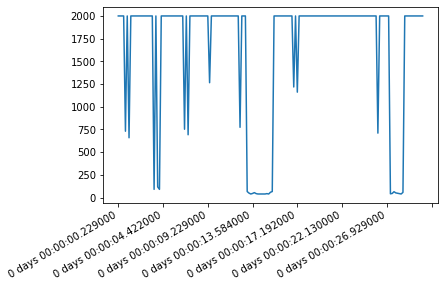

In [95]:
robot_df['distance'].plot()